In this project, you'll look at a data science competition helping scientists track animals in a wildlife preserve. The goal is to take images from camera traps and classify which animal, if any, is present. To complete the competition, you'll expand your machine learning skills by creating more powerful neural network models that can take images as inputs and classify them into one of multiple categories.

Some of the things you'll learn are:

How to read image files and prepare them for machine learning
How to use PyTorch to manipulate tensors and build a neural network model
How to build a Convolutional Neural Network that works well with images
How to use that model to make predictions on new images
How to turn those predictions into a submission to the competition

In [1]:
# !pip install torch torchvision torchaudio


In [2]:
import os
import sys

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import torch
import torchvision
from PIL import Image
from torchvision import transforms

In [3]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("PIL version:", PIL.__version__)
print("torch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)

Platform: win32
Python version: 3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:14) [MSC v.1929 64 bit (AMD64)]
---
matplotlib version: 3.10.0
pandas version: 2.2.3
PIL version: 11.1.0
torch version: 2.7.0+cpu
torchvision version: 0.22.0+cpu


# Working with Tensors in PyTorch

In [4]:
my_values = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
my_tensor = torch.Tensor(my_values)

print("my_tensor class:", type(my_tensor))
print(my_tensor)

my_tensor class: <class 'torch.Tensor'>
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


# Tensor Attributes

In [5]:
print("my_tensor shape:", my_tensor.shape) 

print("my_tensor dtype:", my_tensor.dtype)  

my_tensor shape: torch.Size([4, 3])
my_tensor dtype: torch.float32


# Print the device of my_tensor.

Tensors also have a .device attribute, which specifies the hardware on which it's stored. By default, tensors are created on the computer's CPU. Let's check if that's the case for my_tensor

In [6]:
print("my_tensor device:", my_tensor.device)

my_tensor device: cpu


Some computers come with GPUs, which allow for bigger and faster model building. In PyTorch, the cuda package is used to access GPUs on Linux and Windows machines; mps is used on Macs. Let's check what's available on our notebook.

In [7]:
# Check if GPUs available via `cuda`
cuda_gpus_available = torch.cuda.is_available()

# Check if GPUs available via `mps`
mps_gpus_available = torch.backends.mps.is_available()

print("cuda GPUs available:", cuda_gpus_available)
print("mps GPUs available:", mps_gpus_available)

cuda GPUs available: False
mps GPUs available: False


# Tensor slicing

Slice my_tensor, assigning its top two rows to left_tensor and its bottom two rows to right_tensor

In [8]:
left_tensor = my_tensor[:2, :]
right_tensor = my_tensor[2:, :]

print("left_tensor class:", type(left_tensor))
print("left_tensor shape:", left_tensor.shape)
print("left_tensor data type:", left_tensor.dtype)
print("left_tensor device:", left_tensor.device)
print(left_tensor)
print()
print("right_tensor class:", type(right_tensor))
print("right_tensor shape:", right_tensor.shape)
print("right_tensor data type:", right_tensor.dtype)
print("right_tensor device:", right_tensor.device)
print(right_tensor)

left_tensor class: <class 'torch.Tensor'>
left_tensor shape: torch.Size([2, 3])
left_tensor data type: torch.float32
left_tensor device: cpu
tensor([[1., 2., 3.],
        [4., 5., 6.]])

right_tensor class: <class 'torch.Tensor'>
right_tensor shape: torch.Size([2, 3])
right_tensor data type: torch.float32
right_tensor device: cpu
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


# Tensor Math

 Use both the mathematical operator and the class method to add left_tensor to right_tensor. Assign the results to summed_tensor_operator and summed_tensor_method, respectively.

In [9]:
summed_tensor_operator = right_tensor + left_tensor
summed_tensor_method = right_tensor.add(left_tensor)

print("summed_tensor_operator class:", type(summed_tensor_operator))
print("summed_tensor_operator shape:", summed_tensor_operator.shape)
print("summed_tensor_operator data type:", summed_tensor_operator.dtype)
print("summed_tensor_operator device:", summed_tensor_operator.device)
print(summed_tensor_operator)
print()
print("summed_tensor_method class:", type(summed_tensor_method))
print("summed_tensor_method shape:", summed_tensor_method.shape)
print("summed_tensor_method data type:", summed_tensor_method.dtype)
print("summed_tensor_method device:", summed_tensor_method.device)
print(summed_tensor_method)

summed_tensor_operator class: <class 'torch.Tensor'>
summed_tensor_operator shape: torch.Size([2, 3])
summed_tensor_operator data type: torch.float32
summed_tensor_operator device: cpu
tensor([[ 8., 10., 12.],
        [14., 16., 18.]])

summed_tensor_method class: <class 'torch.Tensor'>
summed_tensor_method shape: torch.Size([2, 3])
summed_tensor_method data type: torch.float32
summed_tensor_method device: cpu
tensor([[ 8., 10., 12.],
        [14., 16., 18.]])


In [10]:
ew_tensor_operator = left_tensor*right_tensor
ew_tensor_method = right_tensor.mul(left_tensor)

print("ew_tensor_operator class:", type(ew_tensor_operator))
print("ew_tensor_operator shape:", ew_tensor_operator.shape)
print("ew_tensor_operator data type:", ew_tensor_operator.dtype)
print("ew_tensor_operator device:", ew_tensor_operator.device)
print(ew_tensor_operator)
print()
print("ew_tensor_method class:", type(ew_tensor_method))
print("ew_tensor_method shape:", ew_tensor_method.shape)
print("ew_tensor_method data type:", ew_tensor_method.dtype)
print("ew_tensor_method device:", ew_tensor_method.device)
print(ew_tensor_method)

ew_tensor_operator class: <class 'torch.Tensor'>
ew_tensor_operator shape: torch.Size([2, 3])
ew_tensor_operator data type: torch.float32
ew_tensor_operator device: cpu
tensor([[ 7., 16., 27.],
        [40., 55., 72.]])

ew_tensor_method class: <class 'torch.Tensor'>
ew_tensor_method shape: torch.Size([2, 3])
ew_tensor_method data type: torch.float32
ew_tensor_method device: cpu
tensor([[ 7., 16., 27.],
        [40., 55., 72.]])


In [11]:
left_tensor * right_tensor == right_tensor * left_tensor

tensor([[True, True, True],
        [True, True, True]])

# matrix multiplication methods

there's matrix multiplication, which combines the rows and columns of two tensors to generate a new one. We can use the @ operator or the .matmul() method.

To see how this works, let's create two new tensors with different shapes.

In [12]:
new_left_tensor = torch.Tensor([[2, 5], [7, 3]])
new_right_tensor = torch.Tensor([[8], [9]])

print("new_left_tensor class:", type(new_left_tensor))
print("new_left_tensor shape:", new_left_tensor.shape)
print("new_left_tensor data type:", new_left_tensor.dtype)
print("new_left_tensor device:", new_left_tensor.device)
print(new_left_tensor)
print()
print("new_right_tensor class:", type(new_right_tensor))
print("new_right_tensor shape:", new_right_tensor.shape)
print("new_right_tensor data type:", new_right_tensor.dtype)
print("new_right_tensor device:", new_right_tensor.device)
print(new_right_tensor)

new_left_tensor class: <class 'torch.Tensor'>
new_left_tensor shape: torch.Size([2, 2])
new_left_tensor data type: torch.float32
new_left_tensor device: cpu
tensor([[2., 5.],
        [7., 3.]])

new_right_tensor class: <class 'torch.Tensor'>
new_right_tensor shape: torch.Size([2, 1])
new_right_tensor data type: torch.float32
new_right_tensor device: cpu
tensor([[8.],
        [9.]])


In [13]:
mm_tensor_operator = new_left_tensor @ new_right_tensor
mm_tensor_method = new_left_tensor.matmul(new_right_tensor)

print("mm_tensor_operator class:", type(mm_tensor_operator))
print("mm_tensor_operator shape:", mm_tensor_operator.shape)
print("mm_tensor_operator data type:", mm_tensor_operator.dtype)
print("mm_tensor_operator device:", mm_tensor_operator.device)
print(mm_tensor_operator)
print()
print("mm_tensor_method class:", type(mm_tensor_method))
print("mm_tensor_method shape:", mm_tensor_method.shape)
print("mm_tensor_method data type:", mm_tensor_method.dtype)
print("mm_tensor_method device:", mm_tensor_method.device)
print(mm_tensor_method)

mm_tensor_operator class: <class 'torch.Tensor'>
mm_tensor_operator shape: torch.Size([2, 1])
mm_tensor_operator data type: torch.float32
mm_tensor_operator device: cpu
tensor([[61.],
        [83.]])

mm_tensor_method class: <class 'torch.Tensor'>
mm_tensor_method shape: torch.Size([2, 1])
mm_tensor_method data type: torch.float32
mm_tensor_method device: cpu
tensor([[61.],
        [83.]])


# Tensor mean calculation

In [14]:
my_tensor_mean = my_tensor.mean()

print("my_tensor_mean class:", type(my_tensor_mean))
print("my_tensor_mean shape:", my_tensor_mean.shape)
print("my_tensor_mean data type:", my_tensor_mean.dtype)
print("my_tensor_mean device:", my_tensor_mean.device)
print("my_tensor mean:", my_tensor_mean)

my_tensor_mean class: <class 'torch.Tensor'>
my_tensor_mean shape: torch.Size([])
my_tensor_mean data type: torch.float32
my_tensor_mean device: cpu
my_tensor mean: tensor(6.5000)


# Calculate the mean for each column in my_tensor.

In [15]:
my_tensor_column_means = my_tensor.mean(dim=[0])

print("my_tensor_column_means class:", type(my_tensor_column_means))
print("my_tensor_column_means shape:", my_tensor_column_means.shape)
print("my_tensor_column_means data type:", my_tensor_column_means.dtype)
print("my_tensor_column_means device:", my_tensor_column_means.device)
print("my_tensor column means:", my_tensor_column_means)

my_tensor_column_means class: <class 'torch.Tensor'>
my_tensor_column_means shape: torch.Size([3])
my_tensor_column_means data type: torch.float32
my_tensor_column_means device: cpu
tensor([5.5000, 6.5000, 7.5000])


# Exploring files

In [16]:
import os
import shutil
import pandas as pd

# Step 1: Define paths
data_dir = os.path.join("mydata")
train_features_dir = os.path.join(data_dir, "train_features")
sorted_dir = os.path.join(data_dir, "train_sorted")
csv_path = os.path.join(data_dir, "train_labels.csv")

# # Step 2: Read label CSV
# df = pd.read_csv("mydata/train_labels.csv")

# # Step 3: Loop over each row in the CSV
# for idx, row in df.iterrows():
#     image_id = row["id"]
#     label = row.drop("id").idxmax()  # Get the column name where the value is 1

#     src_img_path = os.path.join(train_features_dir, f"{image_id}.jpg")
#     dest_label_dir = os.path.join(sorted_dir, label)
#     dest_img_path = os.path.join(dest_label_dir, f"{image_id}.jpg")

#     os.makedirs(dest_label_dir, exist_ok=True)  # Create class dir if it doesn't exist

#     if os.path.exists(src_img_path):
#         shutil.copy(src_img_path, dest_img_path)  # Copy image
#     else:
#         print(f"❗️Missing file: {src_img_path}")


In [17]:
import os

train_sorted = os.path.join("train_sorted")

if os.path.exists(train_sorted):
    class_directories = os.listdir(train_sorted)
    print("class_directories type:", type(class_directories))
    print("class_directories length:", len(class_directories))
    print(class_directories[:10])  # Only show the first 10 entries for brevity
else:
    print("🚫 Folder not found:", train_sorted)


class_directories type: <class 'list'>
class_directories length: 8
['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']


# Class distribution mapping

It looks like our training directory contains 8 subdirectories. Judging by their names, each contains the images for one of the classes in our dataset.

Now that we know how our data is organized, let's check the distribution of our classes. In order to do this we'll need to count the number of files in each subdirectory. We'll store our results in a pandas Series() for easy data visualization.

In [18]:
class_distributions_dict = {}

for subdirectory in class_directories:
    dir = os.path.join(train_sorted, subdirectory)
    files = os.listdir(dir)
    num_files= len(files)
    class_distributions_dict[subdirectory] = num_files

class_distributions = pd.Series(class_distributions_dict)

print("class_distributions type:", type(class_distributions))
print("class_distributions shape:", class_distributions.shape)
print(class_distributions)

class_distributions type: <class 'pandas.core.series.Series'>
class_distributions shape: (8,)
antelope_duiker     2474
bird                1641
blank               2213
civet_genet         2423
hog                  978
leopard             2254
monkey_prosimian    2492
rodent              2013
dtype: int64


# Create a bar chart from class_distributions

In [19]:
# # Convert to pandas Series
# class_distributions = pd.Series(class_distributions_dict).sort_values(ascending=False)

# # ✅ Now safely plot
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.bar(class_distributions.index, class_distributions.values)

# ax.set_xlabel("Class Label")
# ax.set_ylabel("Frequency [count]")
# ax.set_title("Class Distribution, Multiclass Training Set")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

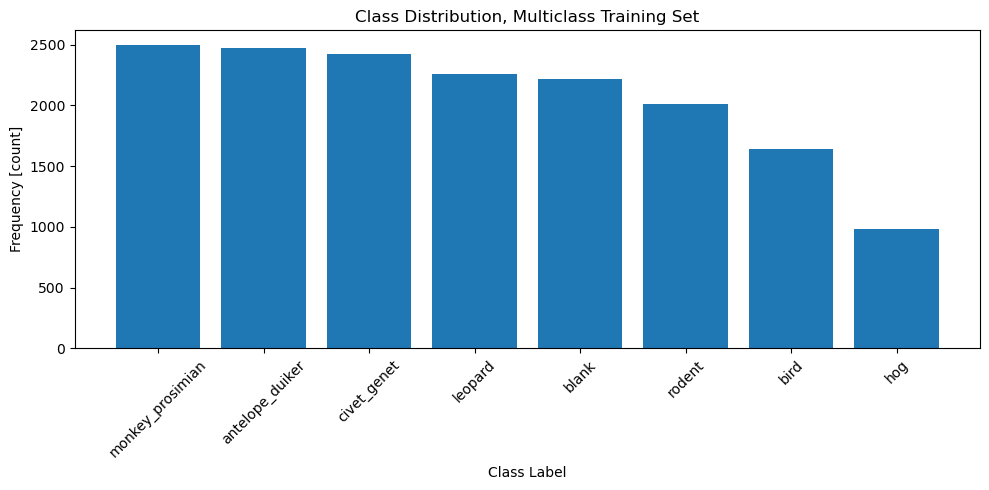

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Use your confirmed absolute path here
train_sorted = r"C:\Users\MonsuratAyinde\Desktop\data_multiclass\mydata\train_sorted"

# List the subfolders (class labels)
class_directories = os.listdir(train_sorted)

# Count the number of files in each class folder
class_distributions_dict = {}
for subdirectory in class_directories:
    dir_path = os.path.join(train_sorted, subdirectory)
    files = os.listdir(dir_path)
    num_files = len(files)
    class_distributions_dict[subdirectory] = num_files

# Convert to pandas Series and sort descending
class_distributions = pd.Series(class_distributions_dict).sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(class_distributions.index, class_distributions.values)

ax.set_xlabel("Class Label")
ax.set_ylabel("Frequency [count]")
ax.set_title("Class Distribution, Multiclass Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# load Images

In [2]:
# Define path for hog image
hog_image_path = os.path.join(train_sorted, "hog", "ZJ000072.jpg")

# Define path for antelope image
antelope_image_path = os.path.join(train_sorted, "antelope_duiker", "ZJ002533.jpg")

print("hog_image_path type:", type(hog_image_path))
print(hog_image_path)
print()
print("antelope_image_path type:", type(antelope_image_path))
print(antelope_image_path)

hog_image_path type: <class 'str'>
C:\Users\MonsuratAyinde\Desktop\data_multiclass\mydata\train_sorted\hog\ZJ000072.jpg

antelope_image_path type: <class 'str'>
C:\Users\MonsuratAyinde\Desktop\data_multiclass\mydata\train_sorted\antelope_duiker\ZJ002533.jpg


# To load these images, we'll use the Pillow library (aka PIL), which comes with lots of tools for image processing. We'll start with the hog.

hog_image_pil type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


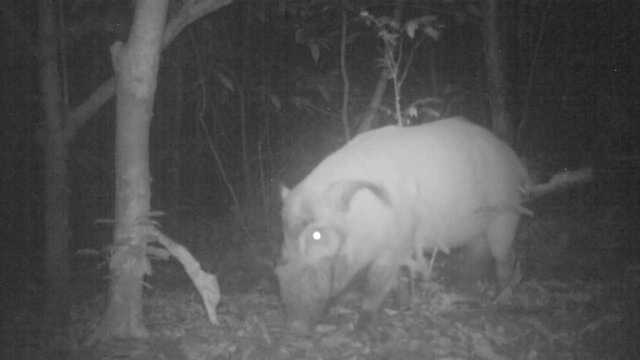

In [3]:
from PIL import Image

hog_image_pil = Image.open(hog_image_path)

print("hog_image_pil type:", type(hog_image_pil))
hog_image_pil

antelope_image_pil type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


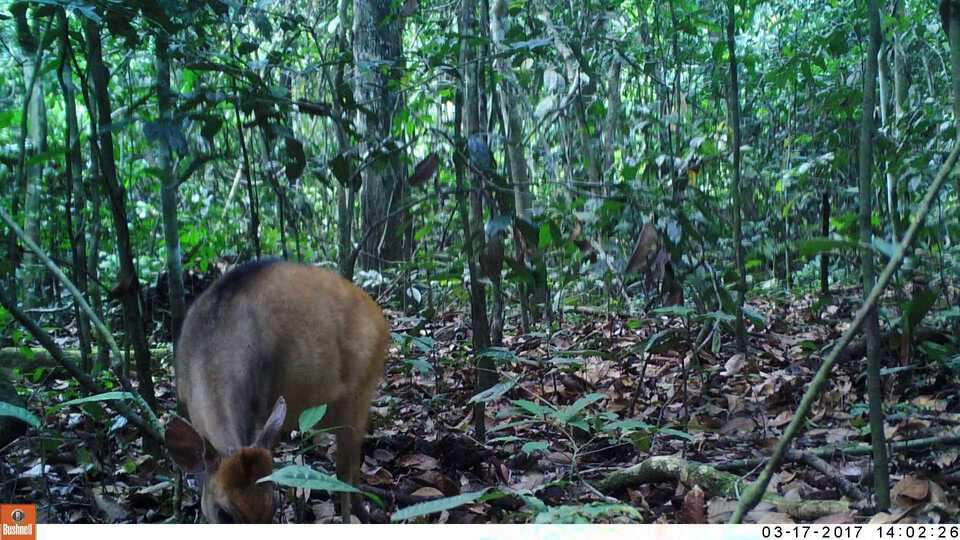

In [4]:
antelope_image_pil = Image.open(antelope_image_path)

print("antelope_image_pil type:", type(antelope_image_pil))
antelope_image_pil

# Image Attribute Extraction

In [5]:
# Get image size
hog_image_pil_size = hog_image_pil.size

# Get image mode
hog_image_pil_mode = hog_image_pil.mode

# Print results
print("hog_image_pil_size class:", type(hog_image_pil_size))
print("hog_image_pil_size length:", len(hog_image_pil_size))
print("Hog image size:", hog_image_pil_size)
print()
print("hog_image_pil_mode class:", type(hog_image_pil_mode))
print("Hog image mode:", hog_image_pil_mode)

hog_image_pil_size class: <class 'tuple'>
hog_image_pil_size length: 2
Hog image size: (640, 360)

hog_image_pil_mode class: <class 'str'>
Hog image mode: L


In [6]:
# Get image size
antelope_image_pil_size = antelope_image_pil.size

# Get image mode
antelope_image_pil_mode = antelope_image_pil.mode

# Get image mode
print("antelope_image_pil_size class:", type(antelope_image_pil_size))
print("antelope_image_pil_size length:", len(antelope_image_pil_size))
print("Antelope image size:", antelope_image_pil_size)
print()
print("antelope_image_pil_mode class:", type(antelope_image_pil_mode))
print("Antelope image mode:", antelope_image_pil_mode)

antelope_image_pil_size class: <class 'tuple'>
antelope_image_pil_size length: 2
Antelope image size: (960, 540)

antelope_image_pil_mode class: <class 'str'>
Antelope image mode: RGB


# Load Tensor

In [8]:
from torchvision import transforms
hog_tensor = transforms.ToTensor()(hog_image_pil)

print("hog_tensor type:", type(hog_tensor))
print("hog_tensor shape:", hog_tensor.shape)
print("hog_tensor dtype:", hog_tensor.dtype)
print("hog_tensor device:", hog_tensor.device)

hog_tensor type: <class 'torch.Tensor'>
hog_tensor shape: torch.Size([1, 360, 640])
hog_tensor dtype: torch.float32
hog_tensor device: cpu


In [16]:
antelope_tensor = transforms.ToTensor()(antelope_image_pil)

print("antelope_tensor type:", type(antelope_tensor))
print("antelope_tensor shape:", antelope_tensor.shape)
print("antelope_tensor dtype:", antelope_tensor.dtype)
print("antelope_tensor device:", antelope_tensor.device)

antelope_tensor type: <class 'torch.Tensor'>
antelope_tensor shape: torch.Size([3, 540, 960])
antelope_tensor dtype: torch.float32
antelope_tensor device: cpu


# RGB channel plotting

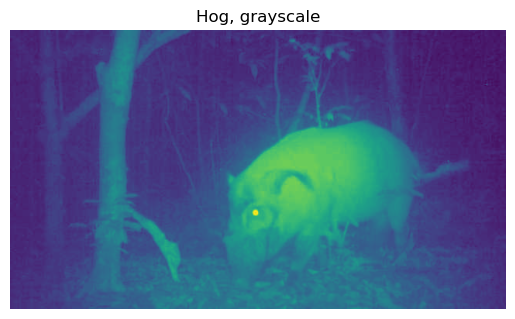

In [17]:
# Create figure with single axis
fig, ax = plt.subplots(1, 1)

# Plot gray channel of hog_tensor
ax.imshow(hog_tensor[0, :, :])

# Turn off x- and y-axis
ax.axis("off")

# Set title
ax.set_title("Hog, grayscale");

#  plot the red, green, and blue channels of antelope_tensor

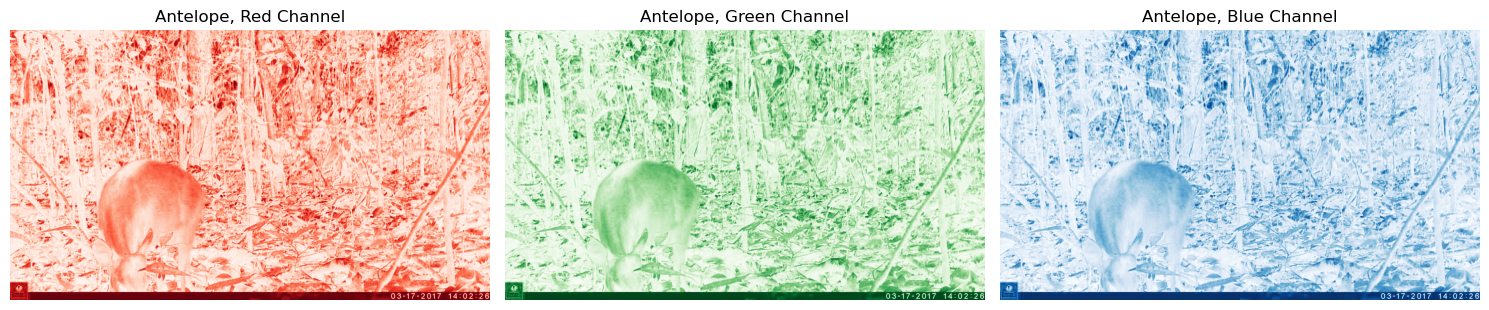

In [18]:
# Create figure with 3 subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

# Plot red channel
red_channel = antelope_tensor[0, :, :]
ax0.imshow(red_channel, cmap="Reds")
ax0.set_title("Antelope, Red Channel")
ax0.axis("off")

# Plot green channel
green_channel = antelope_tensor[1, :, :]
ax1.imshow(green_channel, cmap="Greens")
ax1.set_title("Antelope, Green Channel")
ax1.axis("off")



# Plot blue channel
blue_channel = antelope_tensor[2, :, :]
ax2.imshow(blue_channel, cmap="Blues")
ax2.set_title("Antelope, Blue Channel")
ax2.axis("off")


plt.tight_layout();

# channel value range

In [19]:
max_channel_values = antelope_tensor.amax()
min_channel_values = antelope_tensor.amin()

print("max_channel_values class:", type(max_channel_values))
print("max_channel_values shape:", max_channel_values.shape)
print("max_channel_values data type:", max_channel_values.dtype)
print("max_channel_values device:", max_channel_values.device)
print("Max values in antelope_tensor:", max_channel_values)
print()
print("min_channel_values class:", type(min_channel_values))
print("min_channel_values shape:", min_channel_values.shape)
print("min_channel_values data type:", min_channel_values.dtype)
print("min_channel_values device:", min_channel_values.device)
print("Min values in antelope_tensor:", min_channel_values)

max_channel_values class: <class 'torch.Tensor'>
max_channel_values shape: torch.Size([])
max_channel_values data type: torch.float32
max_channel_values device: cpu
Max values in antelope_tensor: tensor(1.)

min_channel_values class: <class 'torch.Tensor'>
min_channel_values shape: torch.Size([])
min_channel_values data type: torch.float32
min_channel_values device: cpu
Min values in antelope_tensor: tensor(0.)


# Calculate the mean values of the separate color channels in antelope_tensor and assign the result to mean_channel_values.

In [20]:
import torch

mean_channel_values = torch.mean(antelope_tensor, dim=(1, 2))

print("mean_channel_values class:", type(mean_channel_values))
print("mean_channel_values shape:", mean_channel_values.shape)
print("mean_channel_values dtype:", mean_channel_values.dtype)
print("mean_channel_values device:", mean_channel_values.device)
print("Mean channel values in antelope_tensor (RGB):", mean_channel_values)

mean_channel_values class: <class 'torch.Tensor'>
mean_channel_values shape: torch.Size([3])
mean_channel_values dtype: torch.float32
mean_channel_values device: cpu
Mean channel values in antelope_tensor (RGB): tensor([0.2652, 0.3679, 0.3393])
